In [ ]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('spam_ham_dataset.csv')

In [4]:
df.sample(5)

,Unnamed: 0,label,text,label_num
1076,174,ham,Subject: monthly clean - up and bridge back fo...,0
3818,1912,ham,Subject: cleburne - tenaska iv plant\r\ndaren ...,0
555,2651,ham,Subject: noms / actual flow for 2 / 28\r\nwe a...,0
1970,1093,ham,Subject: revised july 2000 availabilities\r\nr...,0
4062,538,ham,Subject: april lst noms . . .\r\n- - - - - - -...,0


In [5]:
df.shape

(5171, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [7]:
df.rename(columns={'label':'target'},inplace=True)
df.sample(5)

,Unnamed: 0,target,text,label_num
4269,4287,spam,Subject: shelby why can ' t you call me back ?...,1
3067,950,ham,"Subject: ec 254 , sp 13 and wc 45 ( 20 ) revis...",0
1168,1964,ham,Subject: txu noms . for 11 / 02 / 00\r\n( see ...,0
203,344,ham,Subject: re : nomination - 2 - 23 - 2000\r\nwe...,0
104,4867,spam,Subject: \r\n80 %\r\n?????????\r\n???\r\n?????...,1


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.head()

,Unnamed: 0,target,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
df.isnull().sum()

Unnamed: 0    0
target        0
text          0
label_num     0
dtype: int64

In [12]:
df.duplicated().sum()
#to check dumplicate,there is none

0

In [13]:
#eda
df['target'].value_counts()

target
0    3672
1    1499
Name: count, dtype: int64

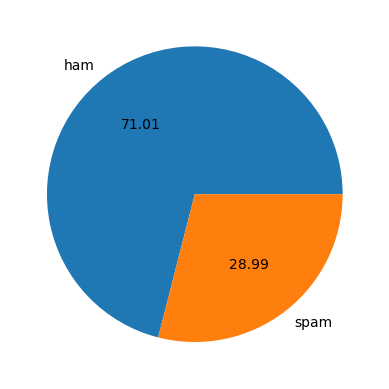

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
#data is imbalance

In [16]:
!pip install --user nltk

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\champ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters']=df['text'].apply(len)

In [20]:
df.head()

,Unnamed: 0,target,text,label_num,num_characters
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336


In [21]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,Unnamed: 0,target,text,label_num,num_characters,num_words
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [23]:
#no of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,Unnamed: 0,target,text,label_num,num_characters,num_words,num_sentences
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [35]:
df[df['target']== 0 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [36]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [41]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

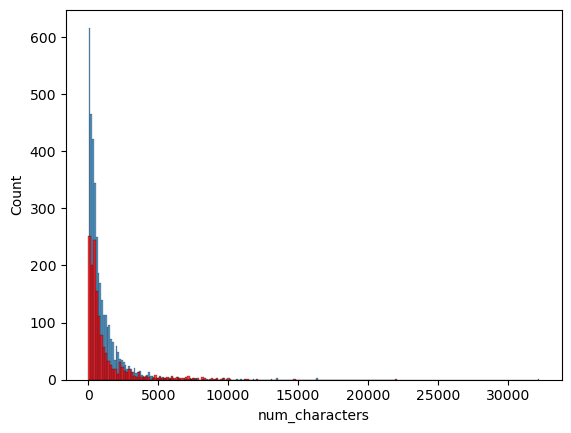

In [42]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']== 1 ]['num_characters'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_sentences', ylabel='Count'>

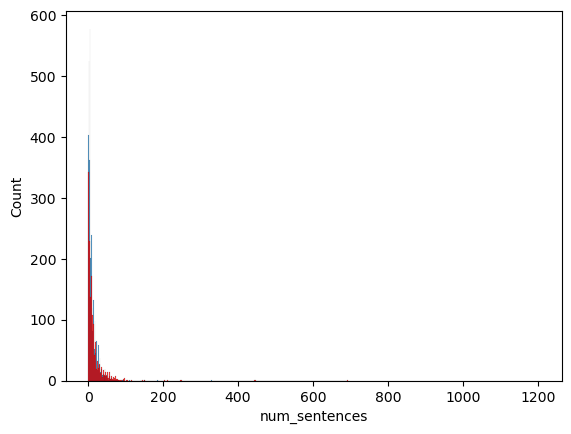

In [43]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']== 1 ]['num_sentences'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

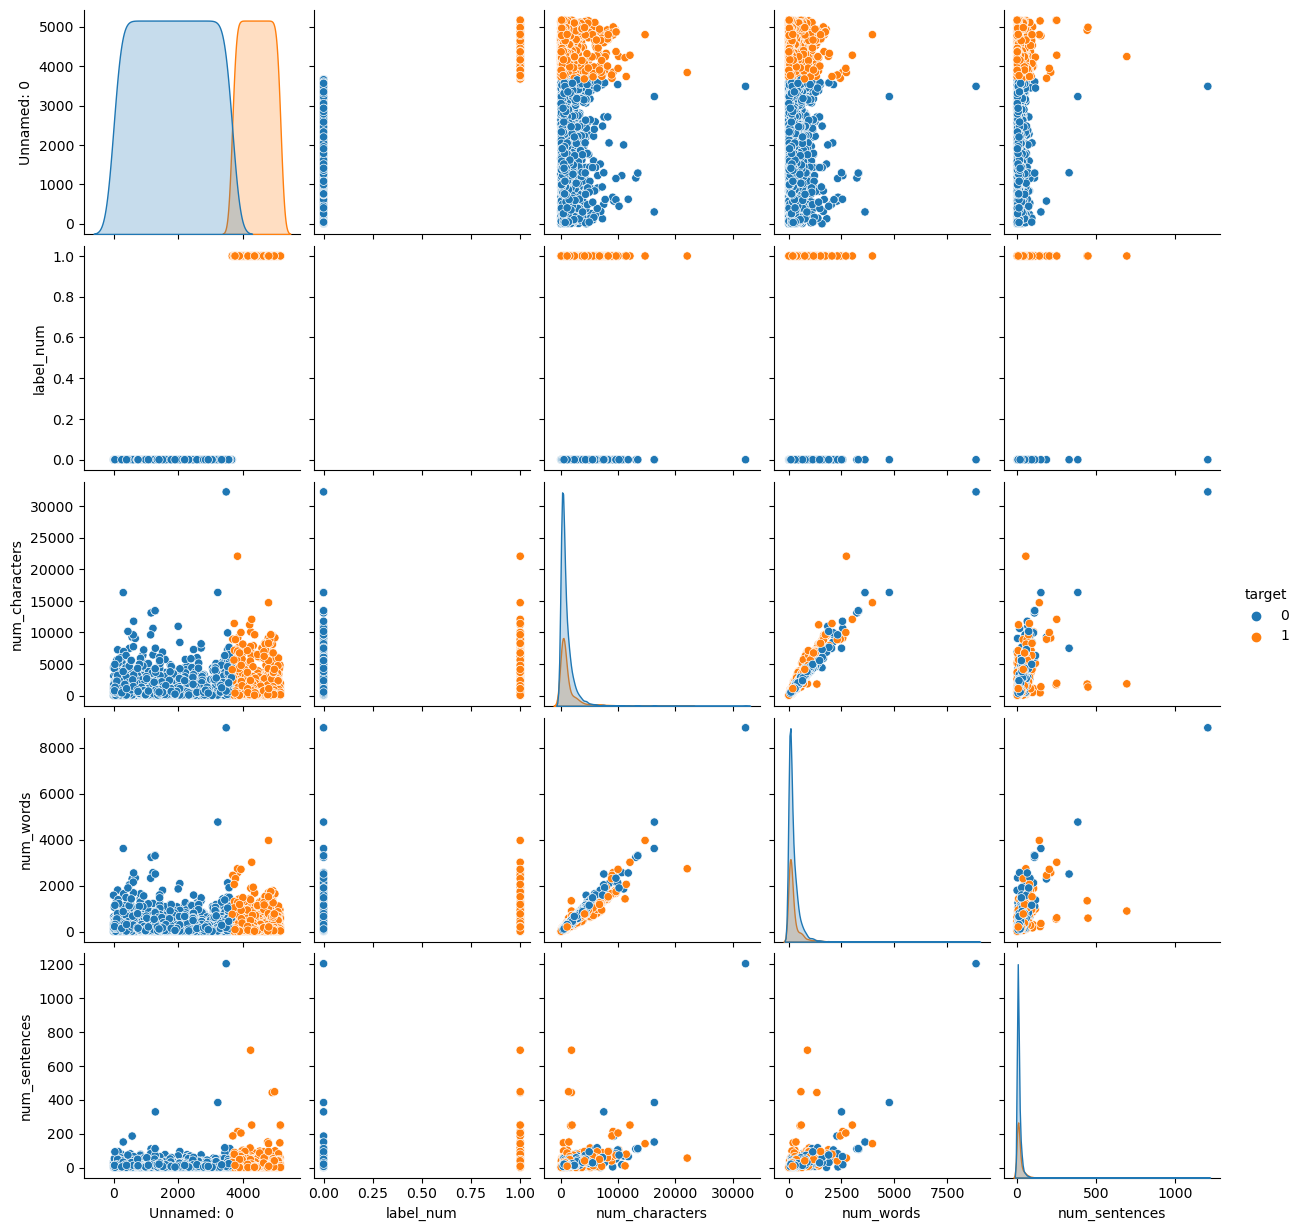

In [31]:
sns.pairplot(df,hue='target')

In [49]:
#data preprocessing
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:          #this will remove special char
        if  i.isalnum():    
            y.append(i)

    text=y[:] #clonnig
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))           #stemming
        
    return " ".join(y)            #return with string

In [50]:
transform_text('hii CHAMPA you are in 20%,loving it')

'hii champa 20 love'

In [46]:
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\champ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords

In [51]:
transform_text('who do i talk to about getting daren farmer a labor distribution report . he\r\nneeds to see what employees are hitting his rc . i know that we have\r\ndiscussed this prior and soem managers are receiving a monthly report but he\r\nis not . who can help us ? ? ?\r\nthank you !\r\nyvette\r\nx 3 . 5953' )

'talk get daren farmer labor distribut report need see employe hit rc know discuss prior soem manag receiv monthli report help us thank yvett x 3 5953'

In [52]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('loving')

'love'

In [53]:
df['transformed_text']=df['text'].apply(transform_text)

In [54]:
df.head()

,Unnamed: 0,target,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [55]:
from wordcloud import WordCloud 


In [56]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [57]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

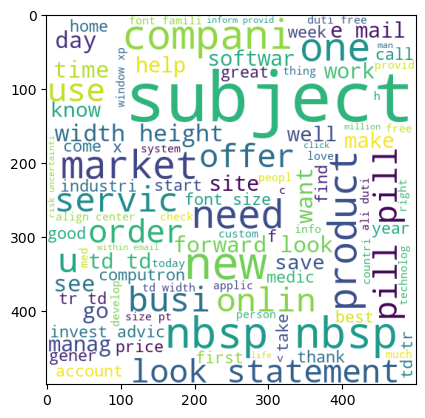

In [58]:
plt.imshow(spam_wc)

In [59]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

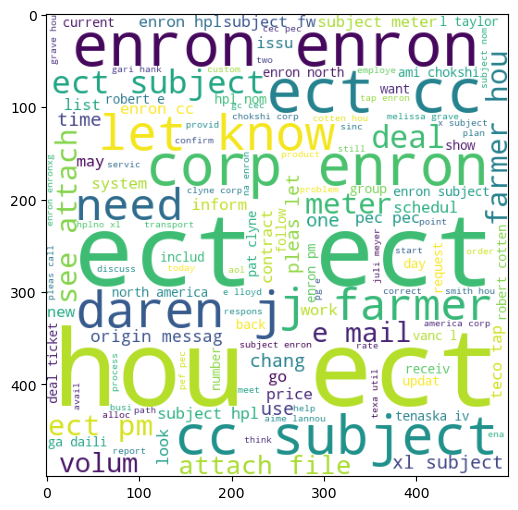

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [61]:
#top 30 words used in spam
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

197452

In [79]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [64]:
ham_corpus=[] #for ham
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [65]:
len(ham_corpus)

388650

In [66]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [67]:
#model buildinig
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer(max_features=40000)

In [80]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [81]:
X.shape

(5171, 40000)

In [82]:
Y=df['target'].values

In [83]:
Y

array([0, 0, 0, ..., 0, 0, 1])

In [84]:
from sklearn.model_selection import train_test_split


In [85]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [86]:
#naive based algo
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [87]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [88]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.9516908212560387
[[717  29]
 [ 21 268]]
0.9023569023569024


In [89]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2)) #mnb has the heighst precision among other

0.927536231884058
[[746   0]
 [ 75 214]]
1.0


In [90]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.855072463768116
[[724  22]
 [128 161]]
0.8797814207650273


In [91]:
#tfidf->mnb
#model improving


In [92]:
import pickle
pickle.dump(tfidf,open('vecctorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [93]:
import pickle

# Define the path to your pickle file
file_path = r'C:\Users\champ\pyythonnn\vecctorizer.pkl'

# Open the file in binary mode and load the object
with open(file_path, 'rb') as file:
    vectorizer = pickle.load(file)
